# Problem Statement

In [ ]:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W) ---> considered as target variable for prediction

By the problem statement we have to predict the number of wins so lets do Linear regression

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [91]:
data = pd.read_csv("abalone.csv")

In [92]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [93]:
data["Rings"].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

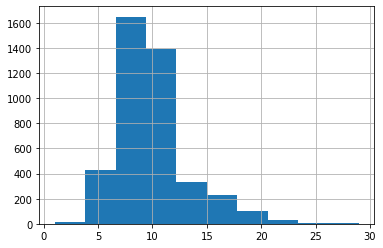

In [94]:
data["Rings"].hist()

In [95]:
data.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [97]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [98]:
target = pd.DataFrame([], columns=["Rings"])
target["Rings"] = data["Rings"]
data.drop("Rings", axis = 1)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [99]:
target

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


In [100]:
sexmap = { 'M' : 0, "F" : 1, "I" : 2}
data["Sex"] = data["Sex"].map(sexmap)

In [101]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data_new = pd.DataFrame(scale.fit_transform(data), columns=data.columns)
data = data_new
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-1.154346,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.154346,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.053798,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-1.154346,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,1.261943,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...,...,...
4172,0.053798,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,-1.154346,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,-1.154346,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624
4175,0.053798,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [102]:
covmat = data.cov()
covmat

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000239,-0.448873,-0.458355,-0.418028,-0.461349,-0.441032,-0.454767,-0.445656,-0.351906
Length,-0.448873,1.000239,0.987048,0.827752,0.925483,0.898129,0.903234,0.897921,0.556853
Diameter,-0.458355,0.987048,1.000239,0.833883,0.925674,0.893376,0.899940,0.905547,0.574797
Height,-0.418028,0.827752,0.833883,1.000239,0.819417,0.775158,0.798510,0.817534,0.557601
Whole weight,-0.461349,0.925483,0.925674,0.819417,1.000239,0.969638,0.966606,0.955584,0.540519
Shucked weight,-0.441032,0.898129,0.893376,0.775158,0.969638,1.000239,0.932184,0.882828,0.420984
Viscera weight,-0.454767,0.903234,0.899940,0.798510,0.966606,0.932184,1.000239,0.907874,0.503940
Shell weight,-0.445656,0.897921,0.905547,0.817534,0.955584,0.882828,0.907874,1.000239,0.627724
Rings,-0.351906,0.556853,0.574797,0.557601,0.540519,0.420984,0.503940,0.627724,1.000239


In [103]:
eig_values, eig_vectors = np.linalg.eig(covmat)
print("eignen vector count: \n\n%s" %len(eig_vectors))
print("\neigne vectors :\n\n", eig_vectors)
print("\neigne values :\n\n", eig_values)

eignen vector count: 

9

eigne vectors :

 [[-2.02301846e-01 -8.33639860e-01  5.12859421e-01  1.49718559e-02
  -6.55995464e-03  2.76662468e-02 -1.21077527e-03 -7.71973501e-03
   2.99898172e-04]
 [ 3.64142288e-01 -1.07939201e-01 -1.35535615e-02 -2.95095243e-02
   6.03485102e-01  1.35449440e-02 -4.76526274e-02  6.98407748e-01
  -1.65264284e-02]
 [ 3.65323762e-01 -8.60011348e-02  5.35131052e-03 -3.97869493e-02
   5.87256873e-01 -5.85167817e-02 -2.32656487e-02 -7.13228150e-01
   4.27179207e-04]
 [ 3.32966795e-01 -3.02535091e-02  1.02181110e-01 -8.98754873e-01
  -2.56671876e-01  5.79340252e-02  2.65767433e-02  8.14063885e-03
  -2.67242885e-03]
 [ 3.70318103e-01 -1.34253930e-01 -7.99380840e-02  2.06897599e-01
  -2.42369743e-01 -1.32716256e-02  1.17176240e-01 -9.07658581e-03
  -8.50242193e-01]
 [ 3.54746521e-01 -2.07149810e-01 -2.25722407e-01  2.08040344e-01
  -1.83029475e-01  4.00668227e-01  6.24400633e-01 -1.03247161e-02
   3.91145631e-01]
 [ 3.60924428e-01 -1.42569687e-01 -1.17654407e-01 

In [104]:
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
6.968716302539054
0.7770007109407234
0.6650556563986755
0.258392269583151
0.16600371776501457
0.08444736503187414
0.06348695812672812
0.012652403159836734
0.006399788868726005


In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_data = pca.fit_transform(data)
print(data.shape)
print(x_data.shape)

(4177, 9)
(4177, 2)


In [106]:
x_data

array([[-1.05870397,  2.14917362],
       [-3.1782045 ,  1.51855766],
       [-0.53624167,  0.01285348],
       ...,
       [ 2.22329034,  0.24152837],
       [ 1.55657773, -0.56152749],
       [ 5.02977229, -0.29752821]])

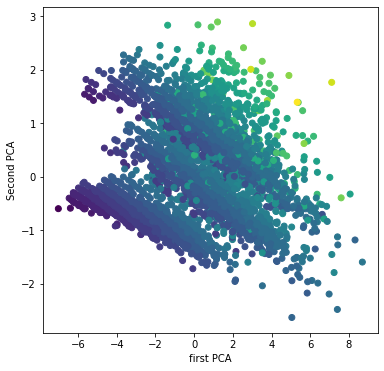

In [107]:
plt.figure(figsize=(6,6))
plt.scatter(x_data[:,0], x_data[:,1], c = target["Rings"])
plt.xlabel("first PCA")
plt.ylabel("Second PCA")

plt.show()

In [108]:
x = x_data
y = target["Rings"]

In [109]:
from sklearn.model_selection import  train_test_split,KFold, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [110]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 7, test_size = 0.20)

In [111]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3341, 2), (3341,), (836, 2), (836,))

In [112]:
models = []

models.append(("LR", LinearRegression()))
models.append(("L", Lasso()))
models.append(("R", Ridge()))
models.append(("RAN", RandomForestRegressor()))
models.append(("ADA", AdaBoostRegressor()))
models.append(("GBS", GradientBoostingRegressor()))
models.append(("XGB", xgb.XGBRegressor(random_state=1,learning_rate=0.01)))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state = 7)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    
    results.append(cv_results)
    names.append(name)
    
    msg = '%s: %f, %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.551541, 0.030849
L: 0.412511, 0.033066
R: 0.551543, 0.030838
RAN: 0.708254, 0.030912
ADA: 0.532734, 0.039303
GBS: 0.701092, 0.042710
XGB: -0.616093, 0.139863


In [113]:
ran = RandomForestRegressor()
ran.fit(x_train,y_train)
print("score : ", ran.score(x_train,y_train))
prediction = ran.predict(x_test)
print(prediction)
print(r2_score(y_test, prediction))
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test, prediction))




score :  0.9588071576932635
[ 8.79 12.62  9.95  9.   11.    7.91  5.13 13.35 11.05  8.76  6.06  7.97
  8.49 10.99 10.87  5.83  9.11  6.94  8.71  8.94 10.84  8.9  11.17  8.45
 14.8  10.99  8.63  5.01  9.61 10.91 24.34 11.2   8.03 11.2  15.88  9.07
  7.18  8.39  9.99  4.08 12.57 13.56  8.99  9.03 10.41  8.89 11.96 11.74
  8.    8.98 12.02  8.    3.08 10.9   5.99  9.06 10.68  7.28 10.38  6.02
  5.93  3.57  8.43  8.99  5.2   9.13  9.85 10.18  6.23 15.68 10.95  9.01
 10.87  5.97 15.98  9.37 11.27 11.1   9.54  5.16  6.96  8.02  8.05  9.13
  6.99 11.19  7.69  7.16  9.1  11.69 10.1   9.38 12.47  8.06  6.88 12.14
 13.5  14.2  10.44  9.66  8.94  9.61 10.17 12.06  4.07 10.28  9.46 10.08
  7.99 13.18 10.17 10.95 11.49  5.02  8.93 10.21  9.65 10.65  9.49  9.57
 11.67 11.13 12.7  12.22 10.23  5.72  9.2  10.34  8.18 11.01 11.81 11.74
 10.64  8.12  6.87  9.03 11.7  19.44 11.   13.28  8.11  5.63  8.04 10.95
  9.06  9.91 10.4  18.68  5.03 10.8  11.05 12.41  6.98  9.94 10.97 11.03
  8.    8.06 10.52 19.2

In [114]:
scr1 = cross_val_score(ran, x, y, cv=5)

print(scr1.mean())

0.6320987138565592
